# Assessing models accuracy and systematics

This package provides approximations to the extinction effects in photometric bands. It is not meant to be a full implementation of the extinction curves but a shortcut.
Models come with inherent uncertainties due to the approximation process. To first order, we provide global uncertainties (e.g., rms, biases) associated with the models but it may not be sufficient for all use cases.
To obtain complete uncertainties, one needs to use models and compute the specific statistics. This may require to evaluate the models on a test set with known properties.

This notebook illustrates how to use the {class}`~dustapprox.tools.model_characteristics.ModelCharacteristicsRunner` class from the {mod}`dustapprox.tools.model_characteristics` module to evaluate the accuracy and systematics of dust attenuation models.

```{admonition} version

This notebook is based on Dustapprox version 0.2.0.

```

In [1]:
from dustapprox import __VERSION__
print(f'document using dustapprox version {__VERSION__}')

document using dustapprox version 0.2.0


## Principles

To assess the characteristics of a dustapprox model, we need to compare its predictions to a reference set of data with known properties.

Any given model is defined by a set of passbands, an extinction curve, and a grid of parameters: $R_0$, $A_0$, stellar temperatures, gravities, and metallicities to first order.
The underlying photometric of the models are too large to be distributed with the package, but one can compute them using the {mod}`dustapprox.tools.generate_model` module. 
In particular, one can compute a sparse version of the model grid to be used as a test set. If one changes some properties (e.g. extinction curve), this can also be used to analysis the effect of such changes on the model predictions.

The following lists the steps to run the model characteristics analysis:
1. load a precomputed model library using {func}`dustapprox.models.PrecomputedModel.find`
2. If needed, compute a grid of test data using the properties of the model (passbands, curve, etc), {class}`dustapprox.tools.generate_model.GridParameters`, and {func}`dustapprox.tools.generate_model.GridParameters.generate_grid`. 
3. Evaluate the model predictions on the test data using the {func}`~dustapprox.models.basemodel.BaseModel.predict` method.
4. Compute residuals and other statistics of the model predictions against the test data

We provide a convenience class {class}`dustapprox.tools.model_characteristics.ModelCharacteristicsRunner` to perform these steps and generate some plots of the model characteristics.

## Examples

### Gaia DR3 passbands, F99 extinction curve with variable A0, R0

This section illustrates how to use the {class}`~dustapprox.tools.model_characteristics.ModelCharacteristicsRunner` to evaluate the characteristics of a dustapprox model associated with Gaia DR3 passbands and the F99 extinction curve with variable $A_0$ and $R_0$.

The following snippet ({func}`~dustapprox.tools.model_characteristics.run_model_characteristics`) runs the steps outlined above and generates 2D plots of the model residuals as a function of $A_0$ and $R_0$, one plot per passband.

Computing Vega zeropoints...
Selecting precomputed model library from precomputed...
Selection criteria: {'passband': 'Gaia'}
Selected 1 models.
  GAIA_GAIA3.G: -18.9931 mag
  GAIA_GAIA3.Gbp: -19.5254 mag
  GAIA_GAIA3.Grp: -18.2537 mag
Plotting 2D residuals...
Loading test data grid from gaia_kurucz_F99_small_a0r0_grid.ecsv...
   - Saved model_characteristics_2_GAIA_GAIA3.G.png
   - Saved model_characteristics_2_GAIA_GAIA3.Gbp.png
   - Saved model_characteristics_2_GAIA_GAIA3.Grp.png
Done.


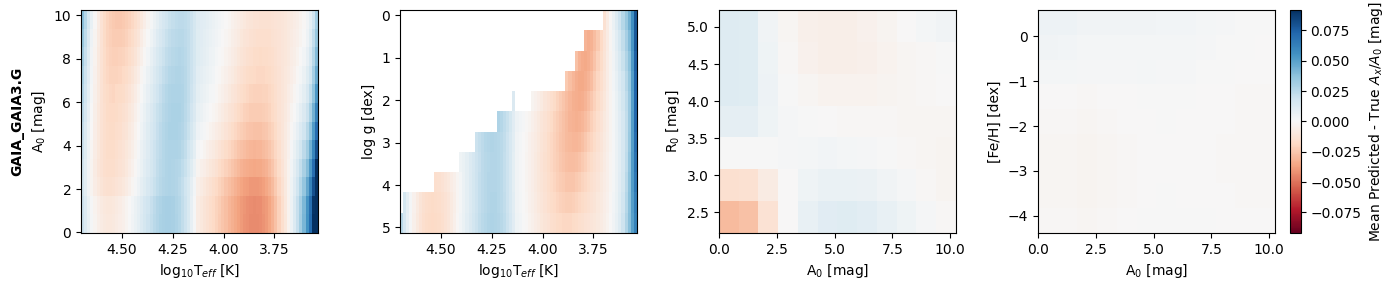

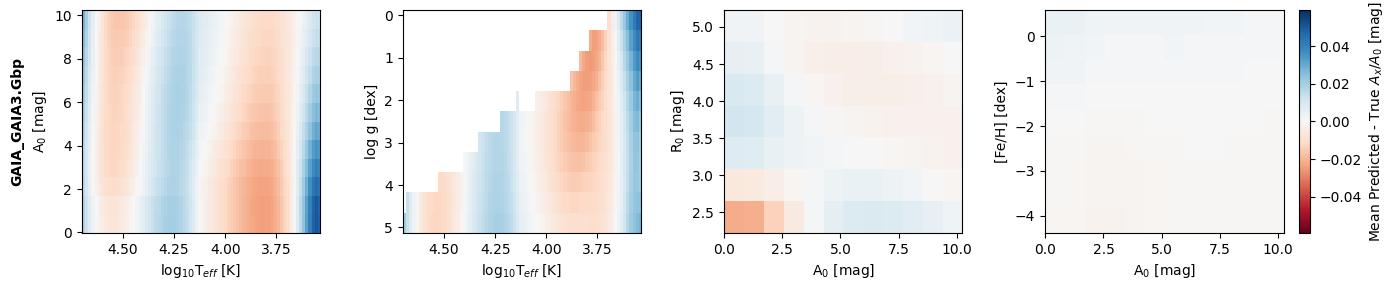

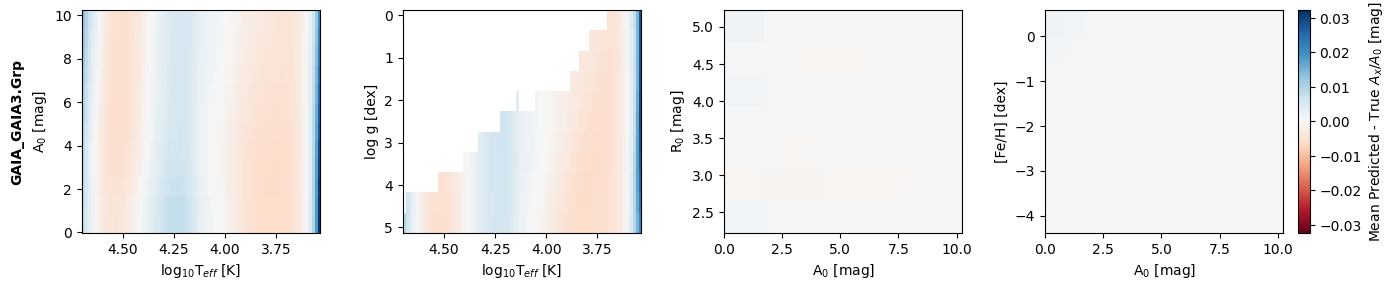

In [ ]:
from dustapprox.tools.model_characteristics import run_model_characteristics

run_model_characteristics(
    passbands="Gaia",
    extinction_curve="F99",
    plot_1d=False,
    plot_2d=True,
    close_figure=False,
)

These plots show that the residuals are generally small (within a few mmag) across the parameter space, indicating that the dustapprox model provides a good approximation of the extinction effects in the Gaia DR3 passbands for the F99 extinction curve with variable $A_0$ and $R_0$. However, this is not perfect and some systematics are visible, especially at low extinction values. One can remark the polynomial nature of the residuals, which is expected given the polynomial approximations used in these dustapprox models.

Hence it is important to be careful and consider these systematics when using the models for scientific analysis.


```{note} 

The runner calculates some approximate zeropoints that are not traditional photometric zeropoints. These correspond to the magnitude offset of the normalized stellar atmospheres and are only used to plot meaninful magnitudes.

```

## Common generic passbands with F99 extinction curve

Computing Vega zeropoints...
Selecting precomputed model library from precomputed...
Selection criteria: {'passband': 'Generic'}
Selected 1 models.
  Generic_Johnson.U: -19.4561 mag
  Generic_Johnson.B: -20.0130 mag
  Generic_Johnson.V: -19.3736 mag
  Generic_Cousins.R: -18.8666 mag
  Generic_Cousins.I: -18.1809 mag
  Generic_Bessell_JHKLM.J: -16.7329 mag
  Generic_Bessell_JHKLM.H: -15.6349 mag
  Generic_Bessell_JHKLM.K: -14.4790 mag
Plotting 2D residuals...
Loading test data grid from generic_kurucz_F99_small_a0r0_grid.ecsv...
   - Saved model_characteristics_2_Generic_Johnson.U.png
   - Saved model_characteristics_2_Generic_Johnson.B.png
   - Saved model_characteristics_2_Generic_Johnson.V.png
   - Saved model_characteristics_2_Generic_Cousins.R.png
   - Saved model_characteristics_2_Generic_Cousins.I.png
   - Saved model_characteristics_2_Generic_Bessell_JHKLM.J.png
   - Saved model_characteristics_2_Generic_Bessell_JHKLM.H.png
   - Saved model_characteristics_2_Generic_Bessell_JHKL

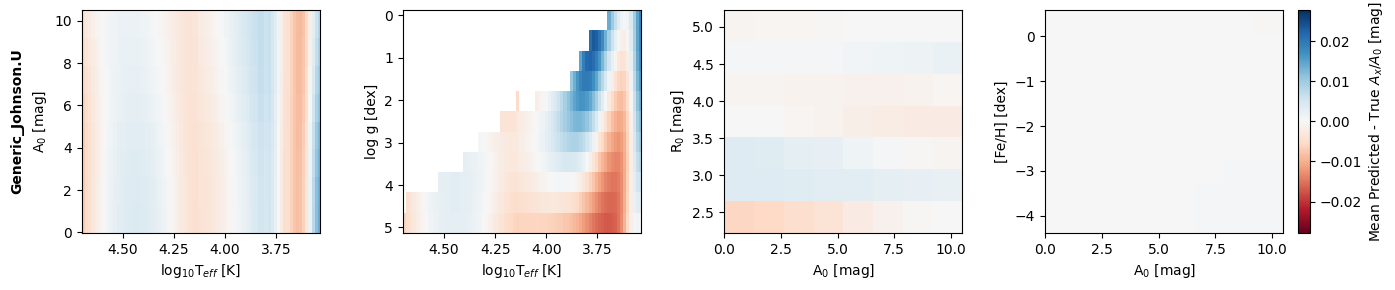

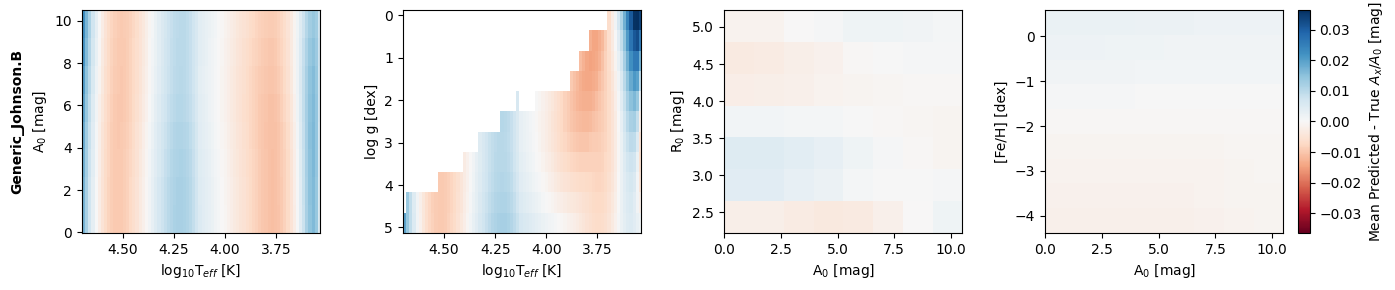

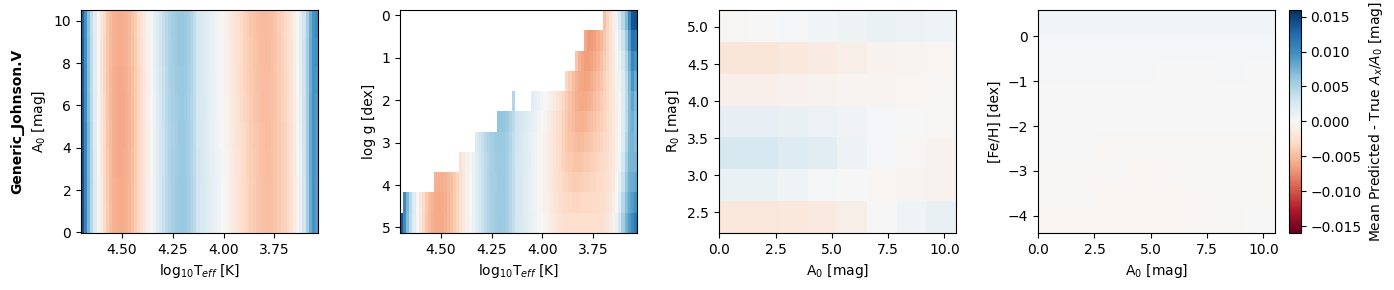

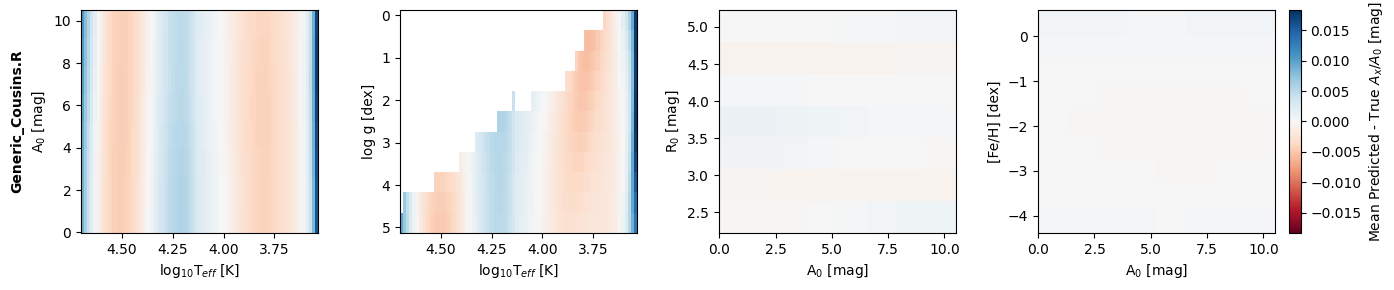

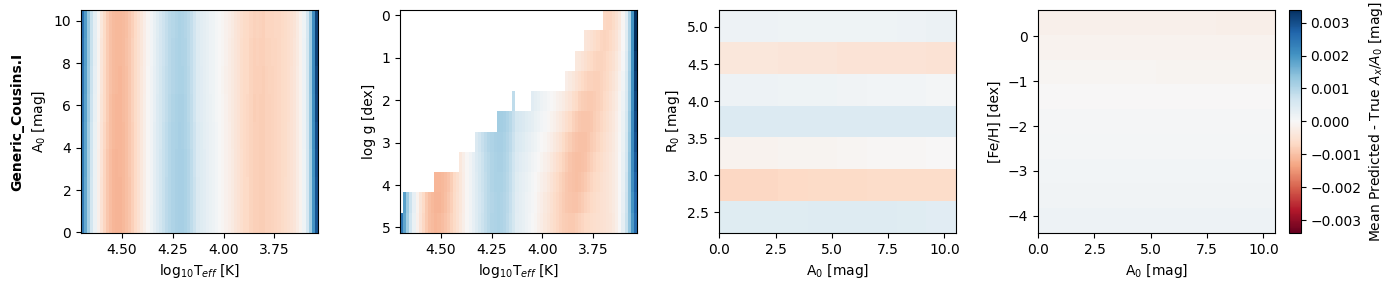

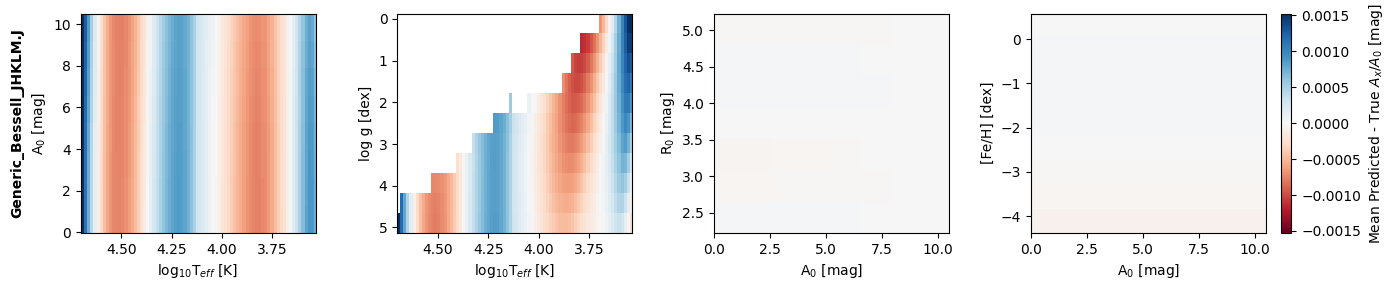

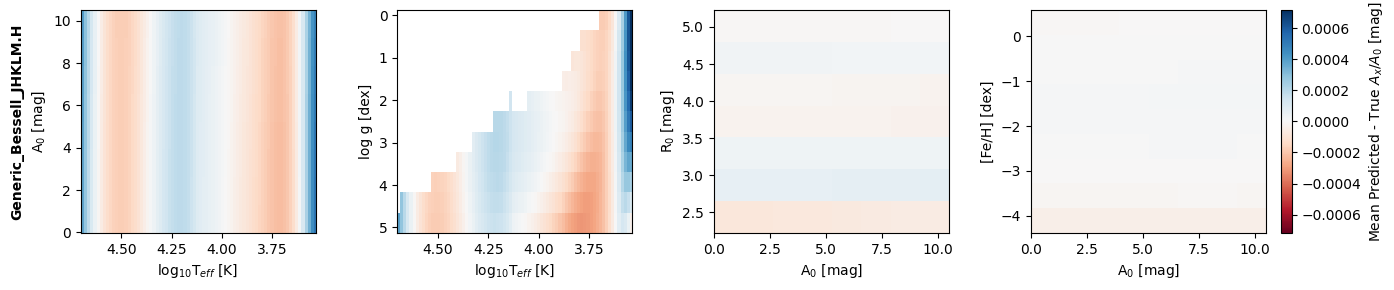

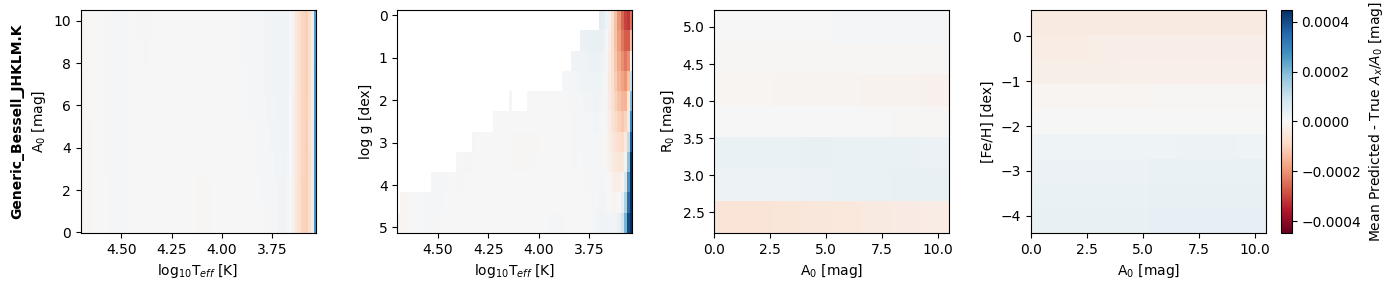

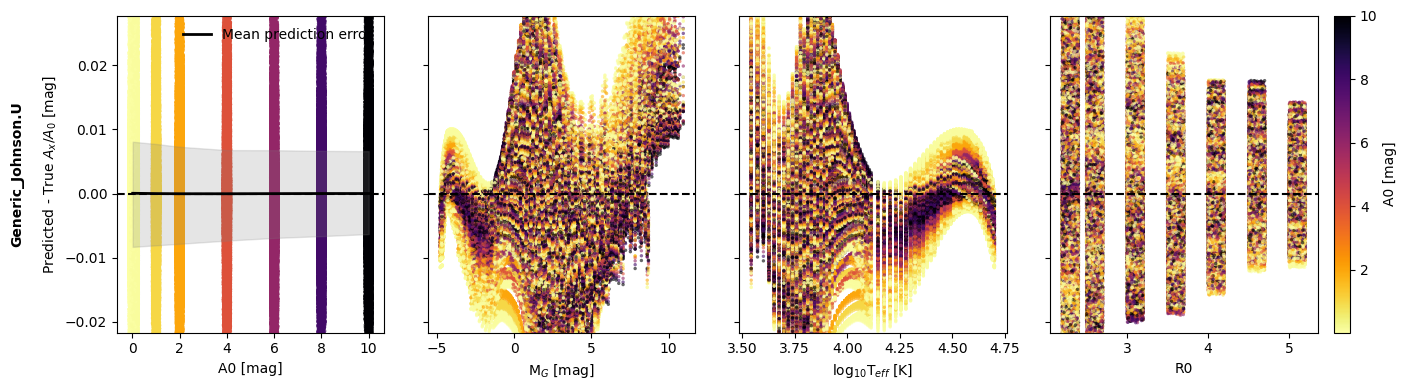

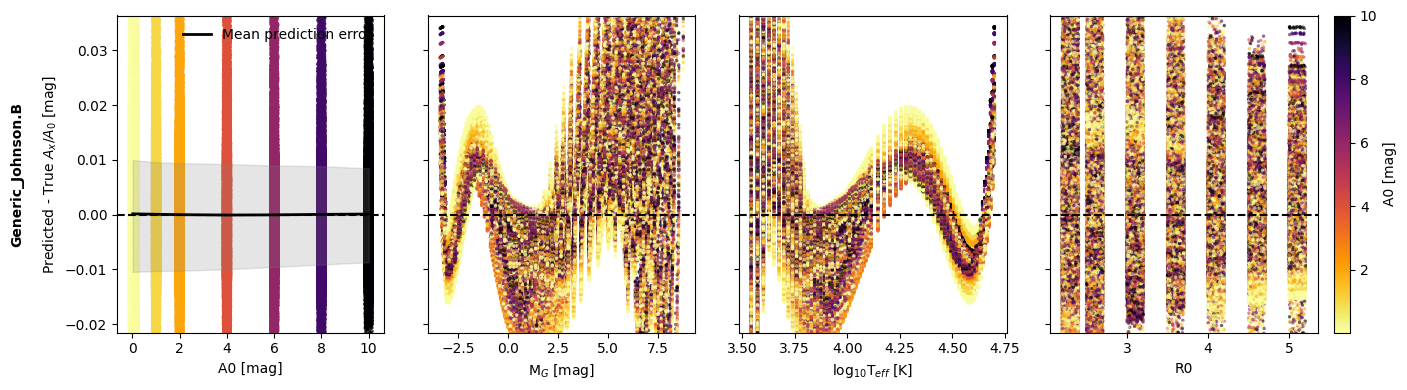

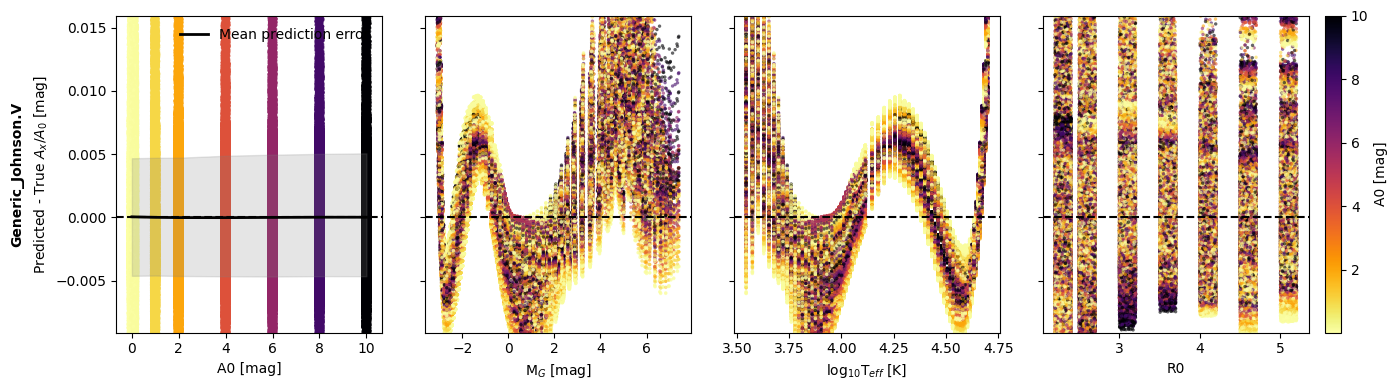

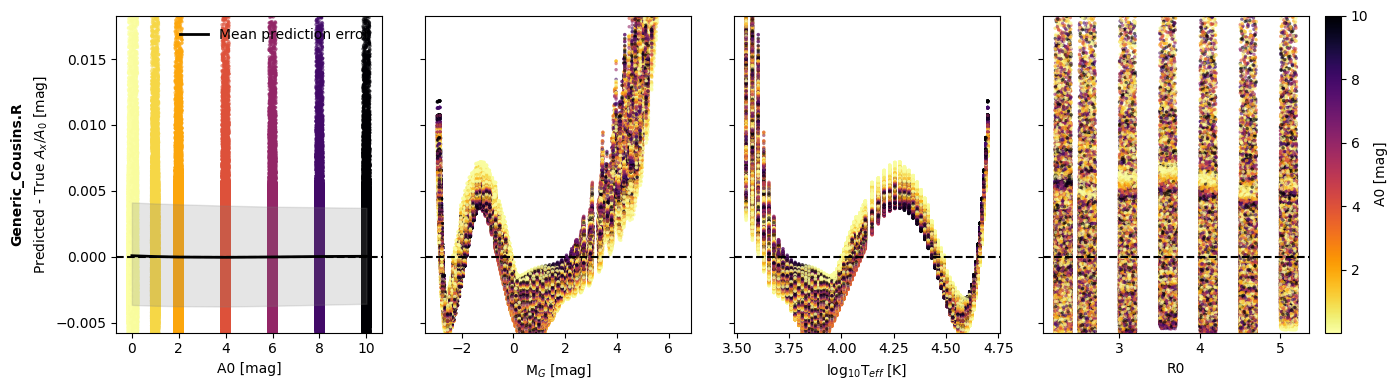

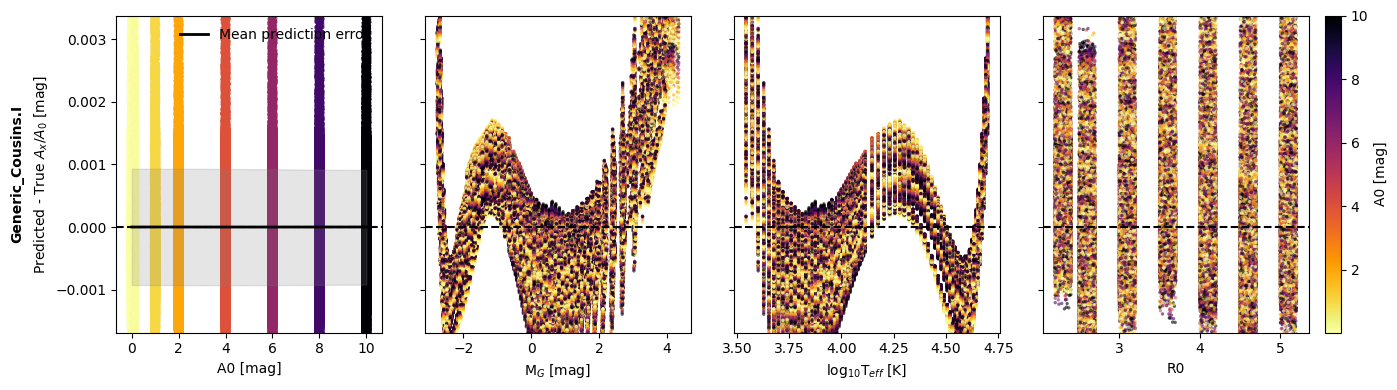

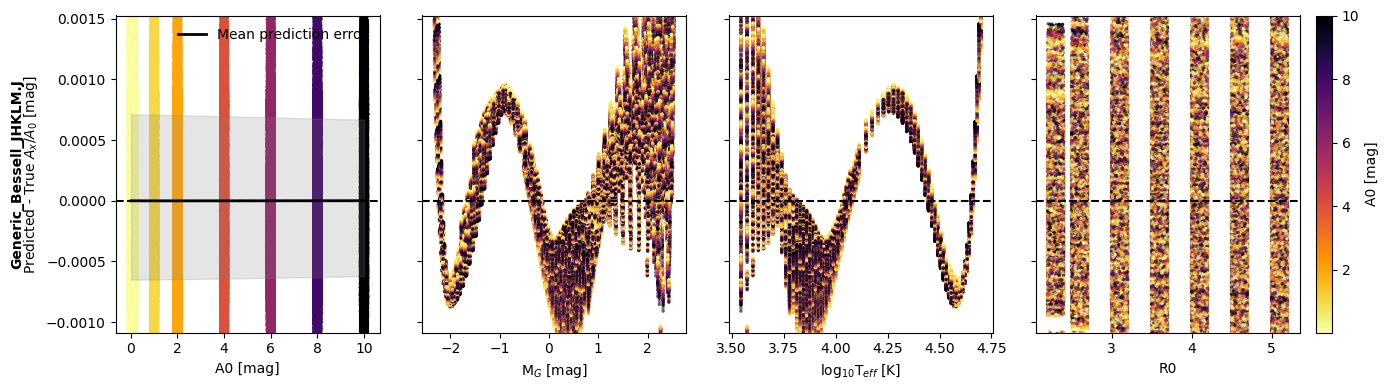

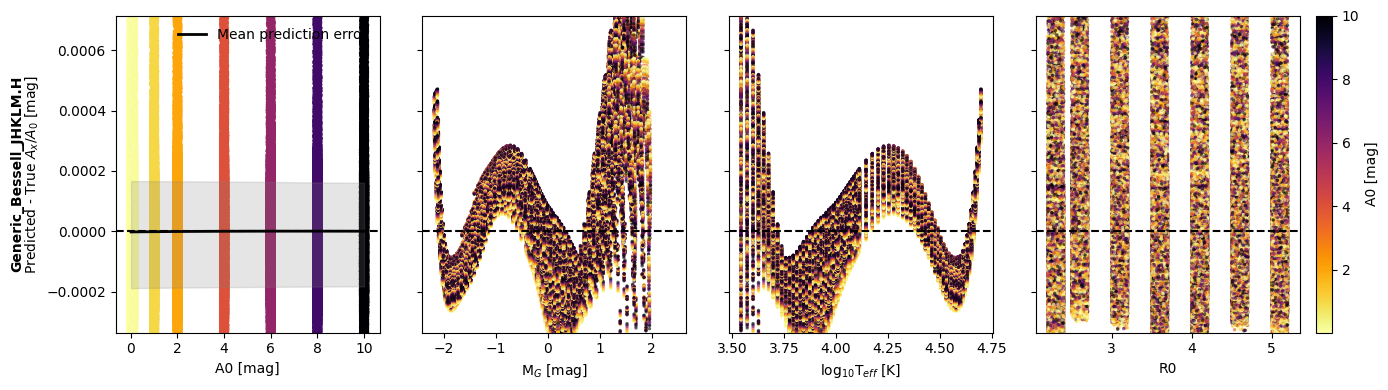

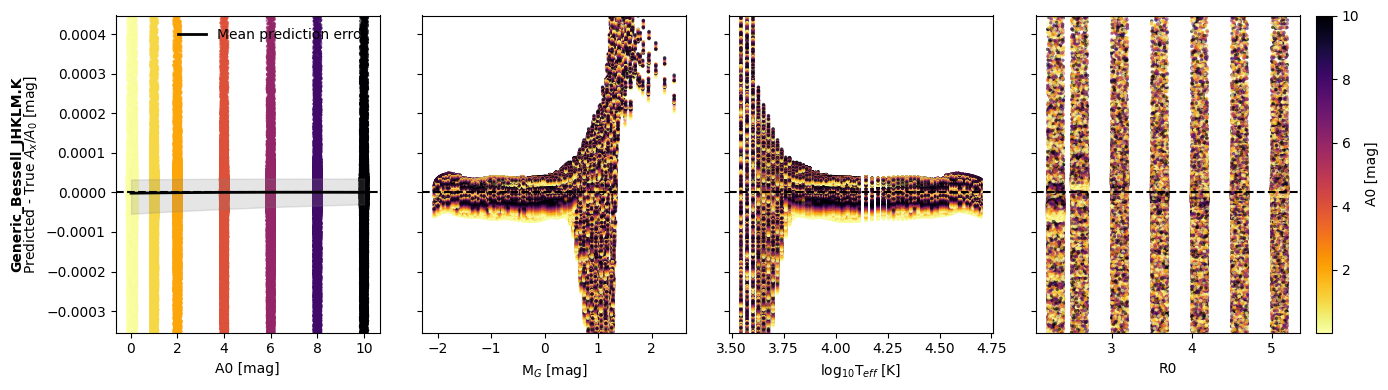

In [5]:
run_model_characteristics(
    passbands="Generic",
    extinction_curve="F99",
    plot_1d=True,
    plot_2d=True,
    close_figure=False,
)